# Project: Wrangling and Analyzing Data (WeRateDogs)

## Data Gathering

-  Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
-  Use the Requests library to download the tweet image prediction (image_predictions.tsv)
-  Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


In [70]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import requests
import os
import json
import re
import seaborn as sns
    



In [2]:
# read csv file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# Use the Requests library to download the tweet image prediction (imageurl=_predictions.tsv) programatically.
url= ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r = requests.get(url)
r.status_code
# Write the response into tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
# Load data from the file into DataFrame 
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')


In [4]:
# Gather data using API
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_token_secret = 'access_token_secret'



In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)



In [6]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
#Test the api by using one tweet id.

api.get_status(892420643555336193, tweet_mode='extended')

Status(_api=<tweepy.api.API object at 0x7ff3b5389970>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

In [8]:
# Create a dataframe for tweet_ids contained in twitter-archive-enhanced

tweets= twitter_archive.tweet_id
len(tweets)

2356

In [9]:
# Create a loop to repeat tweet ids for each tweet id in the twitter-archieve-enhanced dataset and retrieve

unretrieved_id= []
with open('tweet_json.txt', 'w') as json_file:
    for id_ in tweets:
        try:
            tweet= api.get_status(id_)
            tweet= tweet._json
            json.dump(tweet,json_file)
            json_file.write('\n')
        except:
                print('not successful', id_)
                unretrieved_id.append(id_)

not successful 888202515573088257
not successful 877611172832227328
not successful 873697596434513921
not successful 872668790621863937
not successful 872261713294495745
not successful 869988702071779329
not successful 866816280283807744
not successful 861769973181624320
not successful 856602993587888130
not successful 856330835276025856
not successful 851953902622658560
not successful 851861385021730816
not successful 845459076796616705
not successful 844704788403113984
not successful 842892208864923648
not successful 837366284874571778
not successful 837012587749474308
not successful 832636094638288896
not successful 829374341691346946
not successful 827228250799742977
not successful 812747805718642688
not successful 802247111496568832
not successful 779123168116150273
not successful 775096608509886464
not successful 771004394259247104
not successful 770743923962707968
not successful 766864461642756096
not successful 759923798737051648
not successful 759566828574212096
not successful

In [10]:
# Read content of file created and store in a dataframe
df_tweets = []
with open ('tweet_json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count= tweet['retweet_count']
        favorite_count= tweet['favorite_count']
        df_tweets.append({'retweet_count': retweet_count, 'favorite_count': favorite_count, 'tweet_id': tweet_id})
        
tweet_dataframe = pd.DataFrame(df_tweets, columns = ["tweet_id", "retweet_count", "favorite_count"])
tweet_dataframe.head()
        

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6953,33626
1,892177421306343426,5256,29163
2,891815181378084864,3462,21942
3,891689557279858688,7171,36711
4,891327558926688256,7703,35102


## 3. Assessing Data

In this step i will be inspecting my data set for two things which are data quality issues ie issues with content like missing, duplicate, or incorrect data; and tidiness issues ie specific structural issues. These will be done visually and programatically.
I will be documenting any unclean issues I observe during the course of this assessment as good practice.



## Visual Accessment


In [11]:
# Twitter archive data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# Image prediction data
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
tweet_dataframe

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6953,33626
1,892177421306343426,5256,29163
2,891815181378084864,3462,21942
3,891689557279858688,7171,36711
4,891327558926688256,7703,35102
...,...,...,...
2320,666049248165822465,36,88
2321,666044226329800704,114,246
2322,666033412701032449,36,100
2323,666029285002620928,39,112


# Programatic assessment

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [17]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [18]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


## Observations

During the course of assessing the data visually and programatically, i was able to find the following issues:

-   The tweet_id column is duplicated as we have the same across the three dataframes used for the analysis     
-   There is a html tag on the source column in the twitter archive enhanced data set.
-   In the image prediction table some breed names start with upper case while some are in lower case. there need to be some form of consistency.
-   In the twitter archive table the timestamp is in object datatype instead of datetime.
-   The tweet_id is in int64 instead of string data type
-   There are empty cells in the twitter archive enhanced file'
-   The in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, img_num, p1, p1_conf, p1_dog, p2,p2_conf, p2_dog, p3, p3_conf, p3_dog
will not be needed in this analysis.
-   The stages of dog should be in one colunm rather than seperate columns.
-   Some names in p1 are having _ and - which is not supposed to be.
-   Text and url are joined in one column


## Data Cleaning

In [19]:
# Make a copy of the 3 dataframes

twitter_archive_clean = twitter_archive.copy()
img_pred_clean = img_pred.copy()
tweet_dataframe_clean = tweet_dataframe.copy()

# Issue 1

## Define

Remove duplicated columns by merging the 3 dataframes.

## Code:

In [20]:
# Remove duplicated columns by merging the three dataframes.
masterdata= pd.merge(twitter_archive_clean,tweet_dataframe_clean, on='tweet_id')

masterdata= pd.merge(masterdata,img_pred_clean )

## Test:

In [21]:
masterdata.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Issue 2

### Define:

in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp will not be needed in this analysis. Therefore these columns will be removed and the empty cells there wont be an issue anymore.

### Code:

In [22]:
# Remove some columns that are not useful in this analysis
masterdata.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1 , inplace=True)

## Test:

In [23]:
masterdata.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Issue 3

## Define:

image prediction table P1 some breed names start with upper case while some are in lower case. there need to be some form of consistency. I will convert the starting letter to upper case.

## Code:

In [24]:
# Convert all the starting letters in p1 to upper case
masterdata['p1']= masterdata['p1'].str.capitalize()

## Test:

In [25]:
masterdata.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,Orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Issue 4


## Define:

Replace the _ and - in P1 with a space 

## Code:

In [26]:
# Replace _ and - with an empty space

masterdata.p1 = masterdata.p1.str.replace('_',' ')
masterdata.p1 = masterdata.p1.str.replace('-',' ')

## Test:

In [27]:
# Check for the unique values
masterdata.p1.unique()

array(['Orange', 'Chihuahua', 'Paper towel', 'Basset',
       'Chesapeake bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'Golden retriever', 'Whippet', 'Siberian husky', 'Limousine',
       'Mexican hairless', 'Kuvasz', 'Convertible', 'Pug',
       'Blenheim spaniel', 'Labrador retriever', 'Malamute',
       'Italian greyhound', 'Chow', 'German shepherd', 'Doberman',
       'Eskimo dog', 'Web site', 'Weimaraner', 'Saluki', 'Tusker',
       'Street sign', 'Miniature pinscher', 'German short haired pointer',
       'English springer', 'Tricycle', 'Tabby', 'Vizsla', 'Bloodhound',
       'Bernese mountain dog', 'West highland white terrier',
       'Cocker spaniel', 'Flat coated retriever', 'Cardigan',
       'Newfoundland', 'Basketball', 'Shetland sheepdog', 'Komondor',
       'Kelpie', 'Home theater', 'Greater swiss mountain dog',
       'Comic book', 'Laptop', 'Border collie', 'Pole', 'Bull mastiff',
       'Marmot', 

# Issue 5

## Define:

Convert the timestamp from object to datetime
Rename the timestamp to tweet_date
Convert the tweet id from int to string

## Code:

In [28]:
# Convert timestamp from object to datetime
masterdata.timestamp = pd.to_datetime(masterdata["timestamp"])

# Replace the timestamp with tweet_date
masterdata.rename(columns= {'timestamp': 'tweet_date'}, inplace= True)

# Convert the tweet_id from int64 to object
masterdata.tweet_id = masterdata.tweet_id.astype(str)



## Test:

In [29]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2055 non-null   object             
 1   tweet_date          2055 non-null   datetime64[ns, UTC]
 2   source              2055 non-null   object             
 3   text                2055 non-null   object             
 4   expanded_urls       2055 non-null   object             
 5   rating_numerator    2055 non-null   int64              
 6   rating_denominator  2055 non-null   int64              
 7   name                2055 non-null   object             
 8   doggo               2055 non-null   object             
 9   floofer             2055 non-null   object             
 10  pupper              2055 non-null   object             
 11  puppo               2055 non-null   object             
 12  retweet_count       2055 non-null 

# Issue 6

## Define:

Remove the html tag on the source column in the twitter archive enhanced data set.

## Code:

In [30]:
# replace the tags with actual source using regex
masterdata.source = masterdata.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

## Test:

In [31]:
# Unique values and counts of source after replace
masterdata.source.value_counts()

Twitter for iPhone    2015
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

# Issue 7

## Define:

Create a colunm titled 'Stages' for storing different stages of dog which was originally in different columns.

Remove the Columns titled doggo, floofer, pupper, puppo.

## Code:

In [34]:
# Some rows had two dog stages after assessing the data
(masterdata.doggo + masterdata.floofer + masterdata.pupper + masterdata.puppo).value_counts()

NoneNoneNoneNone        1738
NoneNonepupperNone       209
doggoNoneNoneNone         65
NoneNoneNonepuppo         23
doggoNonepupperNone       11
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

In [35]:
# Check for tweets with two stages(doggo and pupper)

masterdata.query('doggo != "None" & pupper != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
354,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,...,1,Curly coated retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
417,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,...,1,Golden retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
445,802265048156610565,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,...,1,Labrador retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
451,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,...,1,Dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
553,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,...,1,Porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
613,775898661951791106,2016-09-14 03:27:11+00:00,Twitter for iPhone,"RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,...,1,Golden retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
651,770093767776997377,2016-08-29 03:00:36+00:00,Twitter for iPhone,RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,...,1,Golden retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
707,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,...,2,Golden retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
763,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,...,1,Dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
854,741067306818797568,2016-06-10 00:39:48+00:00,Twitter for iPhone,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,...,1,Golden retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True


In [36]:
# Replace by verifying dog stage stated in text column

masterdata.at[354, 'doggo']='None'
masterdata.at[354, 'pupper']='None'
masterdata.at[417, 'doggo']='None'
masterdata.at[417, 'pupper']='None'
masterdata.at[445, 'doggo']='None'
masterdata.at[445, 'pupper']='None'
masterdata.at[451, 'doggo']='None'
masterdata.at[451, 'pupper']='None'
masterdata.at[553, 'doggo']='None'
masterdata.at[553, 'pupper']='None'
masterdata.at[613, 'doggo']='None'
masterdata.at[613, 'pupper']='None'
masterdata.at[651, 'doggo']='None'
masterdata.at[651, 'pupper']='None'
masterdata.at[707, 'doggo']='None'
masterdata.at[707, 'pupper']='None'
masterdata.at[763, 'doggo']='None'
masterdata.at[763, 'pupper']='None'
masterdata.at[854, 'doggo']='None'
masterdata.at[854, 'pupper']='None'
masterdata.at[900, 'doggo']='None'
masterdata.at[900, 'pupper']='None'

In [37]:
masterdata.query('doggo != "None" & pupper != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
# Check for tweets with two stages (doggo and puppo)

masterdata.query('doggo != "None" & puppo != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
150,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,...,1,Flat coated retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True


In [39]:
#Replace by keeping stage described in the text column
masterdata.at[150, 'doggo']= 'None'

In [40]:
# Check for tweets with two dog stages (doggo and floofer)
masterdata.query('doggo != "None" & floofer != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
156,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,...,1,English springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True


In [41]:
#Replace by keeping stage described in the text column
masterdata.at[156, 'floofer']= 'None'

## Test:

In [42]:
masterdata.query('doggo != "None" & pupper != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
masterdata.query('doggo != "None" & puppo != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [44]:
masterdata.query('doggo != "None" & floofer != "None"')

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
# All dog stage should be merged in one column

masterdata['stage'] = masterdata.apply(lambda x : re.sub('None,*','',(x.doggo +','+ x.floofer + x.puppo + x.pupper)).rstrip(',') 
                     if re.sub('None','',(x.doggo + x.floofer + x.pupper + x.puppo)) != ''
                     else 'None', axis=1)

In [47]:
# Drop doggo,floofer,pupper,puppo
columns_to_drop = ['doggo','floofer','pupper','puppo']
masterdata.drop(columns = columns_to_drop, inplace = True)


In [48]:
# Check if the new column titled 'stage' has been created
masterdata.head()

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6953,33626,...,Orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5256,29163,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3462,21942,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7171,36711,...,Paper towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7703,35102,...,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


# Issue 8

## Define:

One Prediction data with TRUE and higher confidence is enough among the top three predictions 
Drop the remaining column and uninterested columns


## Code:

In [49]:
# create empty lists to save our choice for each row in the dataset
dog_breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row.p1_dog == True:
        dog_breed.append(row.p1)
        confidence.append(row.p1_conf)
    elif row.p2_dog == True:
        dog_breed.append(row.p2)
        confidence.append(row.p2_conf)
    elif row.p3_dog == True:
        dog_breed.append(row.p3)
        confidence.append(row.p3_conf)
    else:
        dog_breed.append('Unpredicted')
        confidence.append(0)
        
# call function using pandas apply by columns
masterdata.apply(breed_confidence, axis=1)

# add lists created to master dataframe
masterdata['dog_breed'] = dog_breed
masterdata['confidence'] = confidence   

In [50]:
columns_to_drop = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

# Drop the columns that are not needed
masterdata.drop(columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

## Test:

In [51]:
# Check if the breed and confidence values are filled in
masterdata

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,stage,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6953,33626,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5256,29163,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3462,21942,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7171,36711,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7703,35102,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,None,Miniature pinscher,0.560311
2051,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,114,246,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,None,Rhodesian ridgeback,0.408143
2052,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,None,German shepherd,0.596461
2053,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,None,Redbone,0.506826


Store the cleaned data in a new file

In [53]:
masterdata.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)



# Exploratory Data Analysis

In [54]:
# Load the cleaned data into a dataframe

masterdata_new = pd.read_csv('twitter_archive_master.csv')

# Analyzing and Visualization

In this section I will be looking analyzing the cleaned data.

Questions:

1. What are the top 10 most tweeted breed of dog?

2. What is the most common breed of dog?

3. What is the relationship between retweet and favorite count?

## Research Question 1:
What are the top 10 most tweeted breed of dog?


In [60]:
   # Consider only the predicted observations for breed
dog_breed = masterdata_new.query('dog_breed != "Unpredicted"')

In [63]:
# Group by dog_breed aggregating the count, sort it and select top 10
response = dog_breed.groupby('dog_breed').count().rating_numerator.sort_values(ascending=True).nlargest(10)

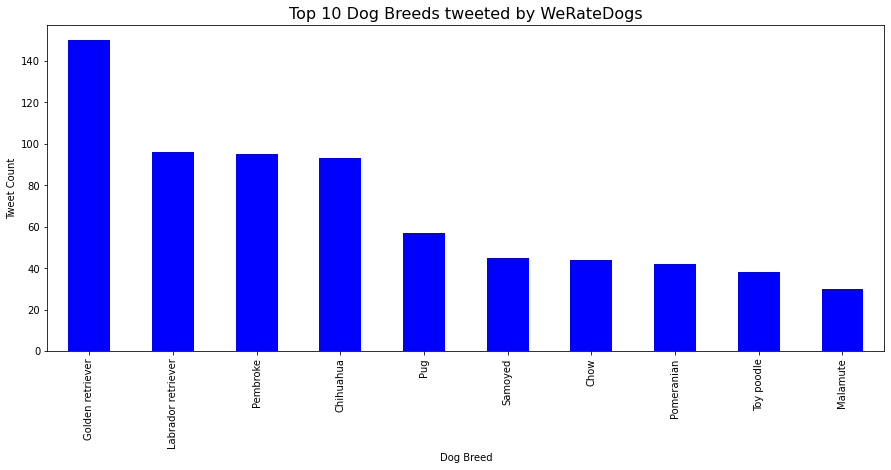

In [64]:
# Plot the response
plt.figure(figsize=(15,6))
response.plot(kind='bar', color=['blue'])
plt.title('Top 10 Dog Breeds tweeted by WeRateDogs', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Tweet Count');


The graph depicts the top 10 breed of dogs tweeted by Weratedogs. It goes from the highest which is the **Golden retriever** to the 10th which is **Malamute**

# Research Question 2

What is the most common breed of dog?

In [67]:
# The most common breed of dog
masterdata_new.dog_breed.value_counts().head()

Unpredicted           321
Golden retriever      150
Labrador retriever     96
Pembroke               95
Chihuahua              93
Name: dog_breed, dtype: int64

From the above we can see that the most common breed of dog is the **GOLDEN RETRIEVER**.

# Research Question 3

What is the relationship between retweet and favorite count?

In [68]:
# Correlation between Retweet and Favorite
masterdata_new[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.861048
favorite_count,0.861048,1.000000


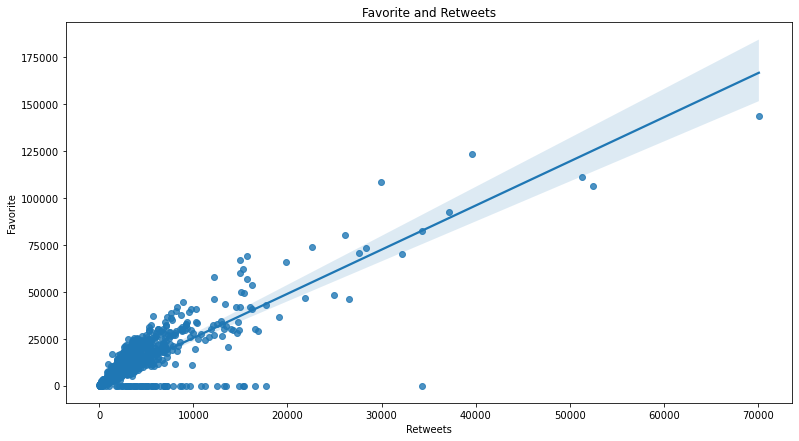

In [71]:
plt.figure(figsize=(13,7))
sns.regplot(x=masterdata_new.retweet_count, y=masterdata_new.favorite_count)
plt.title("Favorite and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorite');

As we can see in the graph above the **favorite** and **retweets** are correlated

## Conclusion

Based on the analysis that was carried out, the bellow conclusion was drawn:

The top 10 breed of dogs are the **Golden retriver,Labrador retriver,Pembroke,Chihuahua,Pug,Samoyed,Chow,Pomeranian,Toy poodle,Malamute.**

The most common breed of dog is the **Golden retriver** which has a total of 150 tweets.

The Retweet and Fvorite are correlated.





# References


[Tweet extration](https://www.kaggle.com/code/pulleyba/project-data-wrangling/notebook)

[Write response into tsv file](https://github.com/keer707/Wrangle-WeRateDogs-Twitter/blob/master/.ipynb_checkpoints/wrangle_act-checkpoint.ipynb)

[Capitalize the first letter](https://www.geeksforgeeks.org/string-capitalize-python/#:~:text=Python%20String%20capitalize()%20method,in%20the%20string%20lowercase%20letters.)

[Replace](https://github.com/keer707/Wrangle-WeRateDogs-Twitter/blob/master/.ipynb_checkpoints/wrangle_act-checkpoint.ipynb)

[Drop columns](https://github.com/keer707/Wrangle-WeRateDogs-Twitter/blob/master/.ipynb_checkpoints/wrangle_act-checkpoint.ipynb)

[Bar chart](https://github.com/keer707/Wrangle-WeRateDogs-Twitter/blob/master/.ipynb_checkpoints/wrangle_act-checkpoint.ipynb)